In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

train.drop(labels='index', axis=1, inplace=True)
test.drop(labels='index', axis=1, inplace=True)

In [3]:
display(train)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [4]:
display(test)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,2.0,2.0,19,1.0,4.0,4.0,1.0,1.0,3.0,2.0
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,1.0,1.0,33,1.0,1.0,5.0,2.0,1.0,5.0,2.0
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,2.0,2.0,13,1.0,4.0,5.0,2.0,1.0,3.0,2.0
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,1.0,1.0,28,1.0,2.0,2.0,2.0,1.0,3.0,2.0
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,2.0,2.0,15,1.0,4.0,5.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,2.0,2.0,16,3.0,10.0,4.0,2.0,1.0,3.0,2.0
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,3.0,1.0,16,3.0,2.0,5.0,2.0,1.0,2.0,2.0
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,31,1.0,1.0,5.0,1.0,1.0,2.0,2.0
35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,...,1.0,1.0,19,1.0,12.0,1.0,2.0,1.0,NaN,2.0


In [5]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

In [6]:
pd.concat([train.nunique().rename('nunique in train'), test.nunique().rename('nunique in test')], axis=1)

,nunique in train,nunique in test
Q1,5,5.0
Q2,5,5.0
Q3,5,5.0
Q4,5,5.0
Q5,5,5.0
...,...,...
voted,2,2.0
married,3,3.0
familysize,20,24.0
ASD,2,2.0


In [7]:
missing_values = pd.concat([train.isnull().sum().rename('missing values in train'), 
                            test.isnull().sum().rename('missing values in test')], axis=1)
missing_values

,missing values in train,missing values in test
Q1,41,119.0
Q2,69,147.0
Q3,50,130.0
Q4,71,125.0
Q5,38,90.0
...,...,...
voted,85,181.0
married,82,180.0
familysize,319,703.0
ASD,89,237.0


In [8]:
"""
train.set_index('country',inplace=True)
train.set_index('introelapse',inplace=True)
train.set_index('surveyelapse',inplace=True)
train.set_index('age',inplace=True)

test.set_index('country',inplace=True)
test.set_index('introelapse',inplace=True)
test.set_index('surveyelapse',inplace=True)
test.set_index('age',inplace=True)

train = train.astype('int')
train.reset_index(inplace=True)

test = test.astype('int')
test.reset_index(inplace=True)
"""

"\ntrain.set_index('country',inplace=True)\ntrain.set_index('introelapse',inplace=True)\ntrain.set_index('surveyelapse',inplace=True)\ntrain.set_index('age',inplace=True)\n\ntest.set_index('country',inplace=True)\ntest.set_index('introelapse',inplace=True)\ntest.set_index('surveyelapse',inplace=True)\ntest.set_index('age',inplace=True)\n\ntrain = train.astype('int')\ntrain.reset_index(inplace=True)\n\ntest = test.astype('int')\ntest.reset_index(inplace=True)\n"

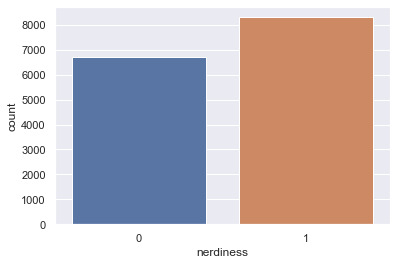

In [9]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="nerdiness", data=train)

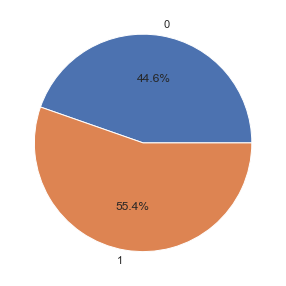

In [10]:
labels, frequencies = np.unique(train.nerdiness.values, return_counts=True)
plt.figure(figsize=(5,5))
plt.pie(frequencies, labels = labels, autopct= '%1.1f%%')
plt.show()

## Q1 ~ Q26

1,2,3의 값은 nerdiness 값이 0인 경향을 보이고,  
4,5의 값은 nerdiness 값이 1인 경향을 보입니다.  
따라서, 결측치는 0으로 라벨링, 1~3까지는 1로 라벨링, 4~5의 경우는 2로 라벨링했습니다.  
이후, Q1 ~ Q26까지의 값을 전부더해 Qs 컬럼 하나로 통일한 후 평균 점수를 내도록 하겠습니다.  

### About Q1 ~ Q10

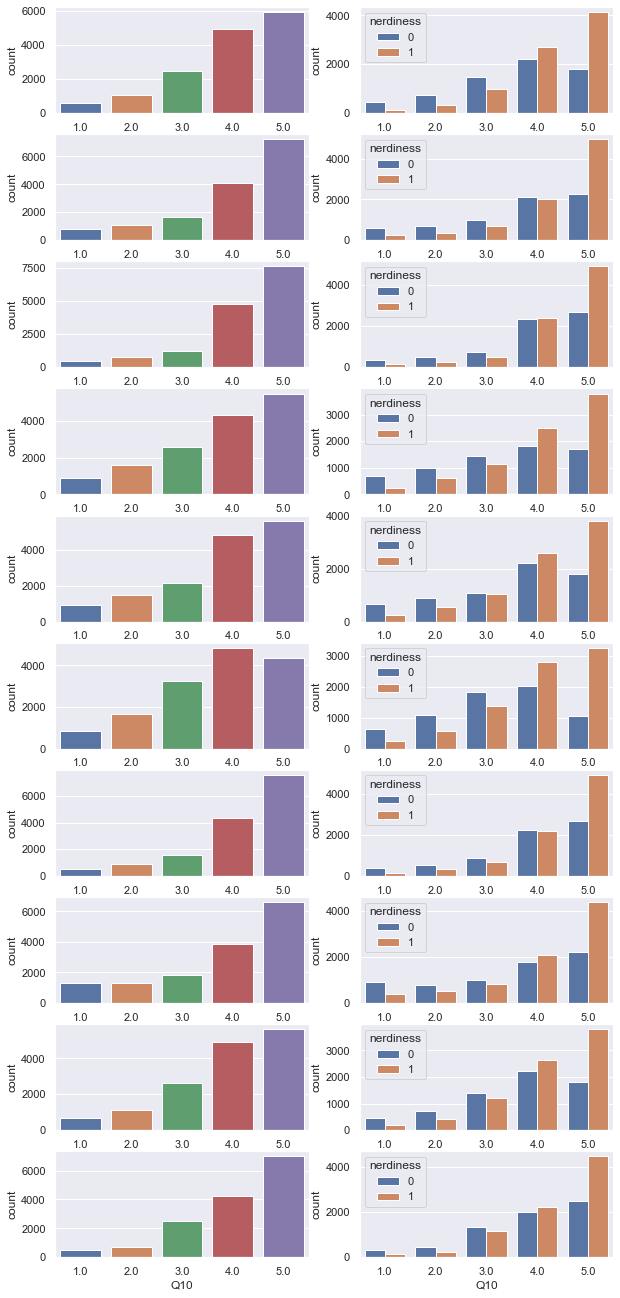

In [11]:
f, ax = plt.subplots(10, 2, figsize=(10, 23))
sns.countplot('Q1', data=train, ax=ax[0][0])
sns.countplot('Q1', hue='nerdiness', data=train, ax=ax[0][1])
sns.countplot('Q2', data=train, ax=ax[1][0])
sns.countplot('Q2', hue='nerdiness', data=train, ax=ax[1][1])
sns.countplot('Q3', data=train, ax=ax[2][0])
sns.countplot('Q3', hue='nerdiness', data=train, ax=ax[2][1])
sns.countplot('Q4', data=train, ax=ax[3][0])
sns.countplot('Q4', hue='nerdiness', data=train, ax=ax[3][1])
sns.countplot('Q5', data=train, ax=ax[4][0])
sns.countplot('Q5', hue='nerdiness', data=train, ax=ax[4][1])
sns.countplot('Q6', data=train, ax=ax[5][0])
sns.countplot('Q6', hue='nerdiness', data=train, ax=ax[5][1])
sns.countplot('Q7', data=train, ax=ax[6][0])
sns.countplot('Q7', hue='nerdiness', data=train, ax=ax[6][1])
sns.countplot('Q8', data=train, ax=ax[7][0])
sns.countplot('Q8', hue='nerdiness', data=train, ax=ax[7][1])
sns.countplot('Q9', data=train, ax=ax[8][0])
sns.countplot('Q9', hue='nerdiness', data=train, ax=ax[8][1])
sns.countplot('Q10', data=train, ax=ax[9][0])
sns.countplot('Q10', hue='nerdiness', data=train, ax=ax[9][1])
plt.show()

### About Q11 ~ Q20

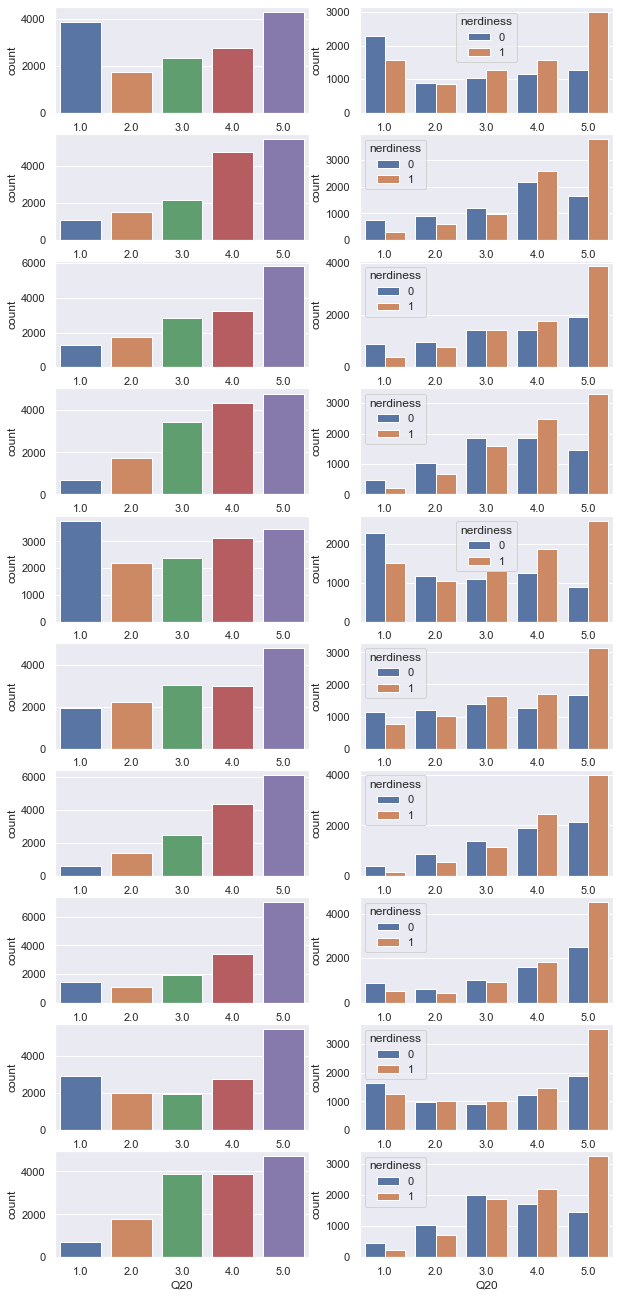

In [12]:
f, ax = plt.subplots(10, 2, figsize=(10, 23))
sns.countplot('Q11', data=train, ax=ax[0][0])
sns.countplot('Q11', hue='nerdiness', data=train, ax=ax[0][1])
sns.countplot('Q12', data=train, ax=ax[1][0])
sns.countplot('Q12', hue='nerdiness', data=train, ax=ax[1][1])
sns.countplot('Q13', data=train, ax=ax[2][0])
sns.countplot('Q13', hue='nerdiness', data=train, ax=ax[2][1])
sns.countplot('Q14', data=train, ax=ax[3][0])
sns.countplot('Q14', hue='nerdiness', data=train, ax=ax[3][1])
sns.countplot('Q15', data=train, ax=ax[4][0])
sns.countplot('Q15', hue='nerdiness', data=train, ax=ax[4][1])
sns.countplot('Q16', data=train, ax=ax[5][0])
sns.countplot('Q16', hue='nerdiness', data=train, ax=ax[5][1])
sns.countplot('Q17', data=train, ax=ax[6][0])
sns.countplot('Q17', hue='nerdiness', data=train, ax=ax[6][1])
sns.countplot('Q18', data=train, ax=ax[7][0])
sns.countplot('Q18', hue='nerdiness', data=train, ax=ax[7][1])
sns.countplot('Q19', data=train, ax=ax[8][0])
sns.countplot('Q19', hue='nerdiness', data=train, ax=ax[8][1])
sns.countplot('Q20', data=train, ax=ax[9][0])
sns.countplot('Q20', hue='nerdiness', data=train, ax=ax[9][1])
plt.show()

### About Q21 ~ Q26

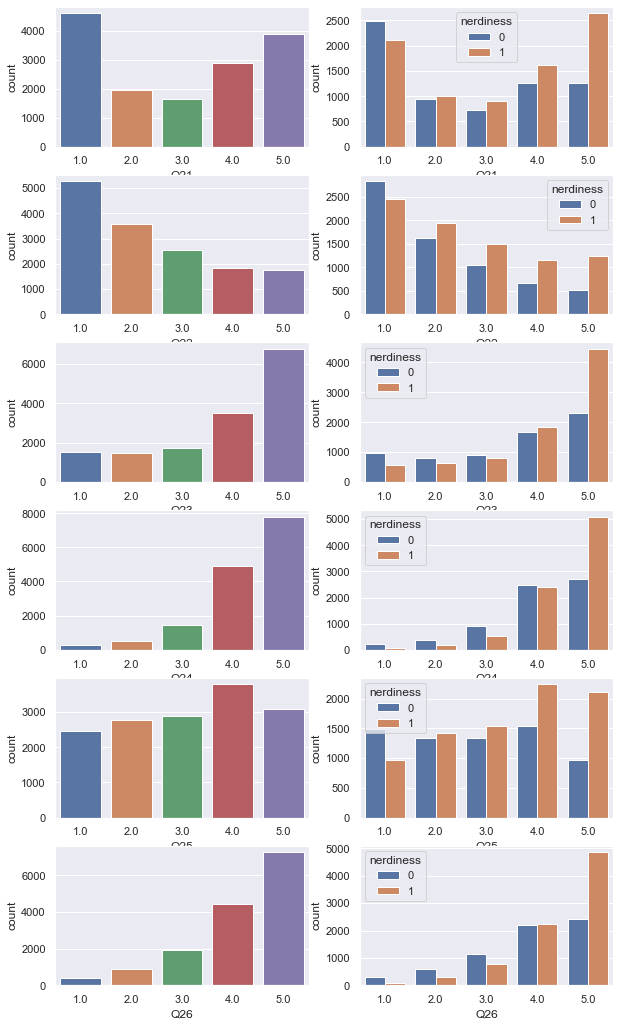

In [13]:
f, ax = plt.subplots(6, 2, figsize=(10, 18))
sns.countplot('Q21', data=train, ax=ax[0][0])
sns.countplot('Q21', hue='nerdiness', data=train, ax=ax[0][1])
sns.countplot('Q22', data=train, ax=ax[1][0])
sns.countplot('Q22', hue='nerdiness', data=train, ax=ax[1][1])
sns.countplot('Q23', data=train, ax=ax[2][0])
sns.countplot('Q23', hue='nerdiness', data=train, ax=ax[2][1])
sns.countplot('Q24', data=train, ax=ax[3][0])
sns.countplot('Q24', hue='nerdiness', data=train, ax=ax[3][1])
sns.countplot('Q25', data=train, ax=ax[4][0])
sns.countplot('Q25', hue='nerdiness', data=train, ax=ax[4][1])
sns.countplot('Q26', data=train, ax=ax[5][0])
sns.countplot('Q26', hue='nerdiness', data=train, ax=ax[5][1])
plt.show()

In [14]:
train_q = train[train.columns[0:26]]
train_q.fillna(0, inplace=True)

test_q = test[test.columns[0:26]]
test_q.fillna(0, inplace=True)

train_q.replace(1, 1, inplace=True)
train_q.replace(2, 1, inplace=True)
train_q.replace(3, 2, inplace=True)
train_q.replace(4, 3, inplace=True)
train_q.replace(5, 3, inplace=True)

test_q.replace(1, 1, inplace=True)
test_q.replace(2, 1, inplace=True)
test_q.replace(3, 2, inplace=True)
test_q.replace(4, 3, inplace=True)
test_q.replace(5, 3, inplace=True)

train_q['Qs'] = train_q.sum(axis=1)
train_q['Qs'] = train_q['Qs'] / 26

test_q['Qs'] = test_q.sum(axis=1)
test_q['Qs'] = test_q['Qs'] / 26

train_q = pd.concat([train_q, train[train.columns[68]]], axis=1)

In [15]:
test_q

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Qs
0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,...,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.769231
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,2.884615
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,1.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,2.692308
3,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,2.576923
4,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,...,3.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0,2.0,2.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,3.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,2.769231
35448,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,...,3.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,2.730769
35449,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,3.0,2.0,3.0,1.0,3.0,3.0,3.0,3.0,2.807692
35450,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,3.0,...,1.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,2.538462


In [16]:
train_q.replace(1, 1, inplace=True)
train_q.replace(2, 1, inplace=True)

test_q.replace(1, 1, inplace=True)
test_q.replace(2, 1, inplace=True)

In [17]:
train_q.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Qs,nerdiness
0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,1.0,1.0,...,3.0,3.0,1.0,3.0,1.0,3.0,1.0,1.0,2.346154,1
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,2.269231,1
2,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,...,3.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,2.346154,1
3,3.0,3.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,...,3.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,2.384615,1
4,3.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,...,3.0,1.0,3.0,1.0,1.0,3.0,3.0,3.0,2.423077,0


In [18]:
test_q.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Qs
0,3.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,...,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,2.769231
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,2.884615
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,1.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,2.692308
3,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,2.576923
4,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,...,3.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,2.538462


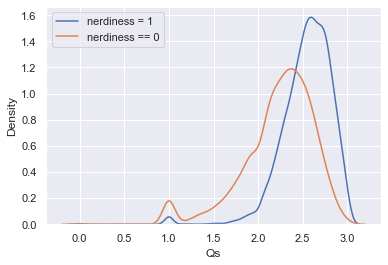

In [19]:
f, ax = plt.subplots(1, 1, figsize=(6,4))
sns.kdeplot(train_q[train_q['nerdiness'] == 1]['Qs'], ax=ax)
sns.kdeplot(train_q[train_q['nerdiness'] == 0]['Qs'], ax=ax)
plt.legend(['nerdiness = 1', 'nerdiness == 0'])

plt.show()

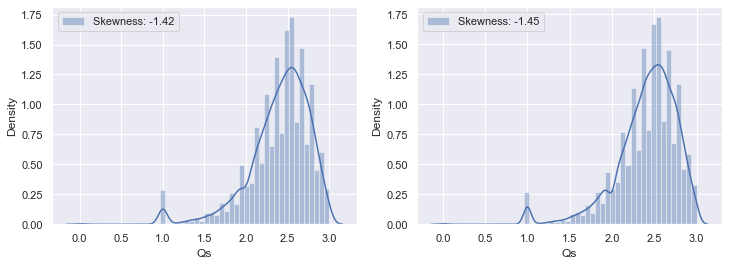

In [21]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
g = sns.distplot(train_q['Qs'], color='b', label='Skewness: {:.2f}'.format(train_q['Qs'].skew()), ax=ax[0])
g = g.legend(loc='best')

g = sns.distplot(test_q['Qs'], color='b', label='Skewness: {:.2f}'.format(test_q['Qs'].skew()), ax=ax[1])
g = g.legend(loc='best')

## TIPI 1 ~ 10

TIPI 1,10 : 좌로 치우침  
TIPI 2~7 : 우로 치우침  
TIPI 8,9 : 중립 느낌 제거해도 괜찮아보임  

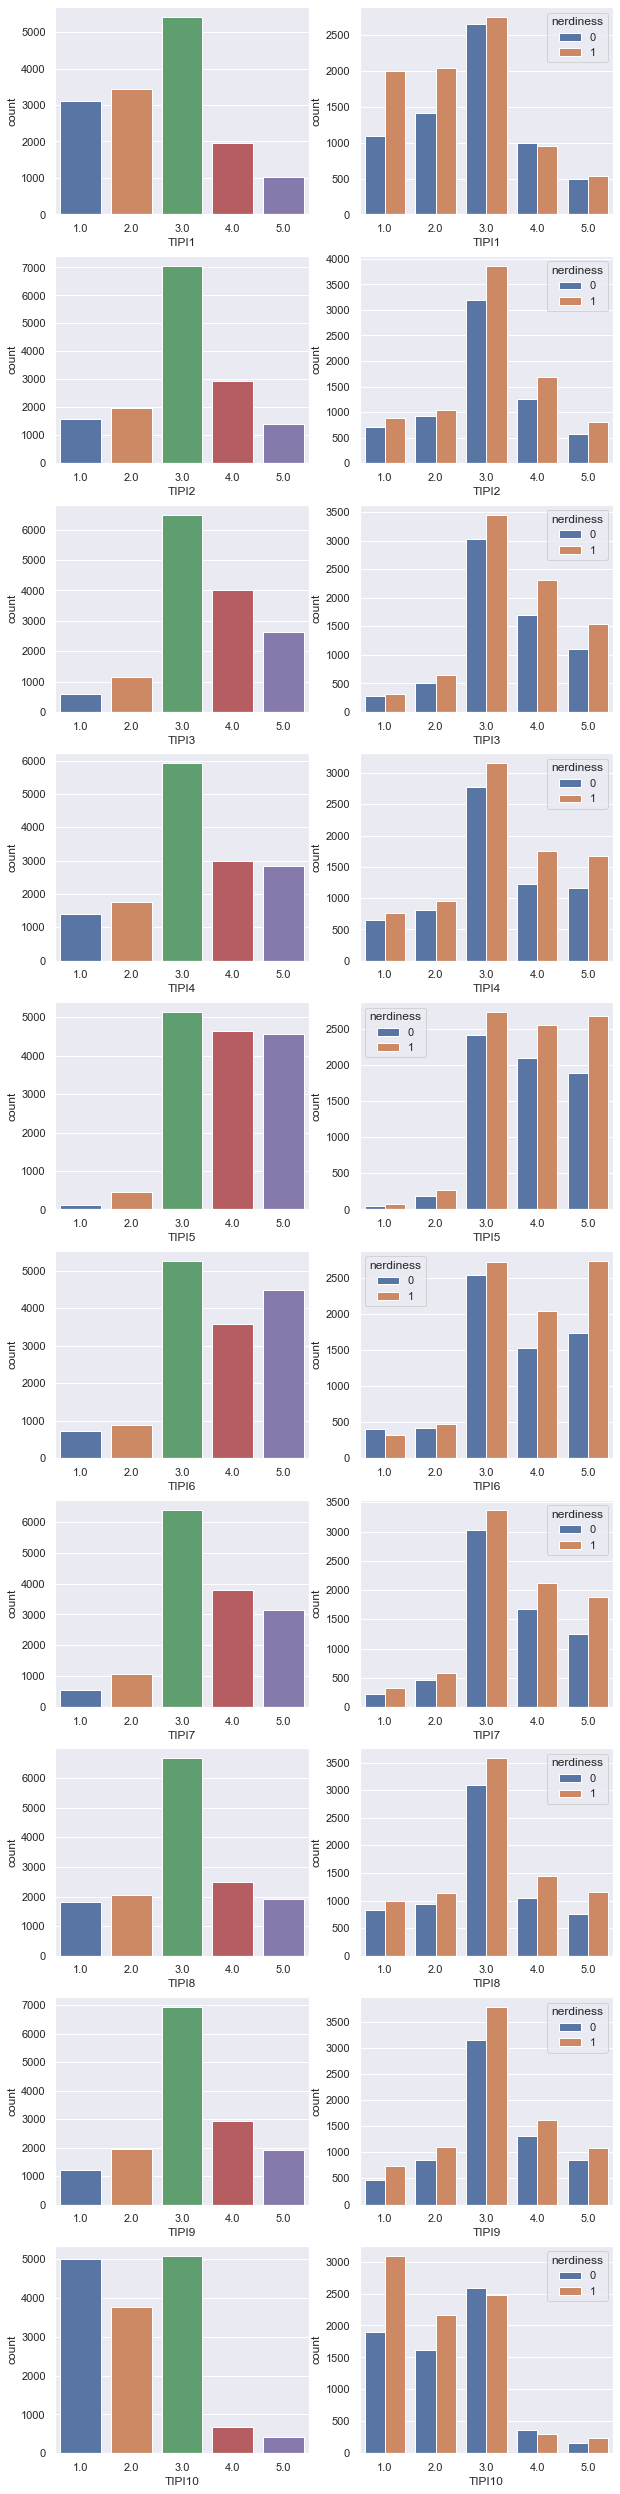

In [23]:
f, ax = plt.subplots(10, 2, figsize=(10, 45))
sns.countplot('TIPI1', data=train, ax=ax[0][0])
sns.countplot('TIPI1', hue='nerdiness', data=train, ax=ax[0][1])
sns.countplot('TIPI2', data=train, ax=ax[1][0])
sns.countplot('TIPI2', hue='nerdiness', data=train, ax=ax[1][1])
sns.countplot('TIPI3', data=train, ax=ax[2][0])
sns.countplot('TIPI3', hue='nerdiness', data=train, ax=ax[2][1])
sns.countplot('TIPI4', data=train, ax=ax[3][0])
sns.countplot('TIPI4', hue='nerdiness', data=train, ax=ax[3][1])
sns.countplot('TIPI5', data=train, ax=ax[4][0])
sns.countplot('TIPI5', hue='nerdiness', data=train, ax=ax[4][1])
sns.countplot('TIPI6', data=train, ax=ax[5][0])
sns.countplot('TIPI6', hue='nerdiness', data=train, ax=ax[5][1])
sns.countplot('TIPI7', data=train, ax=ax[6][0])
sns.countplot('TIPI7', hue='nerdiness', data=train, ax=ax[6][1])
sns.countplot('TIPI8', data=train, ax=ax[7][0])
sns.countplot('TIPI8', hue='nerdiness', data=train, ax=ax[7][1])
sns.countplot('TIPI9', data=train, ax=ax[8][0])
sns.countplot('TIPI9', hue='nerdiness', data=train, ax=ax[8][1])
sns.countplot('TIPI10', data=train, ax=ax[9][0])
sns.countplot('TIPI10', hue='nerdiness', data=train, ax=ax[9][1])
plt.show()

In [24]:
train.columns[30:40]

Index(['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8',
       'TIPI9', 'TIPI10'],
      dtype='object')

In [25]:
train_tipis = train[train.columns[30:40]]
test_tipis = test[test.columns[30:40]]

train_tipis_left = train_tipis[['TIPI1', 'TIPI10']]
train_tipis_left.fillna(0, inplace=True)
test_tipis_left = test_tipis[['TIPI1', 'TIPI10']]
test_tipis_left.fillna(0, inplace=True)

train_tipis_right = train_tipis[train_tipis.columns[1:7]]
train_tipis_right.fillna(0, inplace=True)
test_tipis_right = test_tipis[train_tipis.columns[1:7]]
test_tipis_right.fillna(0, inplace=True)

train_tipis_else = train_tipis[['TIPI8', 'TIPI9']]
train_tipis_else.fillna(0, inplace=True)
test_tipis_else = test_tipis[['TIPI8', 'TIPI9']]
test_tipis_else.fillna(0, inplace=True)

In [26]:
train_tipis.head()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0
1,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0
2,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0
3,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0
4,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0


In [27]:
train_tipis_left = train_tipis[['TIPI1', 'TIPI10']]
train_tipis_left.fillna(0, inplace=True)

In [28]:
train_tipis_right = train_tipis[train_tipis.columns[1:7]]
train_tipis_right.fillna(0, inplace=True)

In [29]:
train_tipis_else = train_tipis[['TIPI8', 'TIPI9']]
train_tipis_else.fillna(0, inplace=True)

In [30]:
train_tipis_left

,TIPI1,TIPI10
0,4.0,3.0
1,4.0,2.0
2,1.0,2.0
3,3.0,3.0
4,3.0,2.0
...,...,...
14995,2.0,3.0
14996,3.0,2.0
14997,1.0,1.0
14998,1.0,1.0


In [31]:
train_tipis_left.replace(5, 10, inplace=True)
train_tipis_left.replace(4, 10, inplace=True)
train_tipis_left.replace(3, 100, inplace=True)
train_tipis_left.replace(2, 1000, inplace=True)
train_tipis_left.replace(1, 1000, inplace=True)
train_tipis_left.replace(10, 1, inplace=True)
train_tipis_left.replace(100, 2, inplace=True)
train_tipis_left.replace(1000, 3, inplace=True)

test_tipis_left.replace(5, 10, inplace=True)
test_tipis_left.replace(4, 10, inplace=True)
test_tipis_left.replace(3, 100, inplace=True)
test_tipis_left.replace(2, 1000, inplace=True)
test_tipis_left.replace(1, 1000, inplace=True)
test_tipis_left.replace(10, 1, inplace=True)
test_tipis_left.replace(100, 2, inplace=True)
test_tipis_left.replace(1000, 3, inplace=True)

train_tipis_left['TIPI_left'] = train_tipis_left.sum(axis=1)
train_tipis_left['TIPI_left'] = train_tipis_left['TIPI_left'] / 2
test_tipis_left['TIPI_left'] = test_tipis_left.sum(axis=1)
test_tipis_left['TIPI_left'] = test_tipis_left['TIPI_left'] / 2

train_tipis_left = pd.concat([train_tipis_left, train[train.columns[68]]], axis=1)

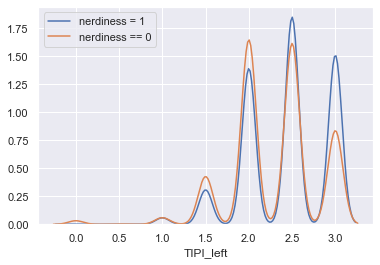

In [32]:
f, ax = plt.subplots(1, 1, figsize=(6,4))
sns.kdeplot(train_tipis_left[train_tipis_left['nerdiness'] == 1]['TIPI_left'], ax=ax)
sns.kdeplot(train_tipis_left[train_tipis_left['nerdiness'] == 0]['TIPI_left'], ax=ax)
plt.legend(['nerdiness = 1', 'nerdiness == 0'])
plt.ylabel('')
plt.show()

In [33]:
train_tipis_left['TIPI_left'] = train_tipis_left.sum(axis=1)
train_tipis_left['TIPI_left'] = train_tipis_left['TIPI_left'] / 2

In [34]:
train_tipis_left = pd.concat([train_tipis_left, train[train.columns[68]]], axis=1)

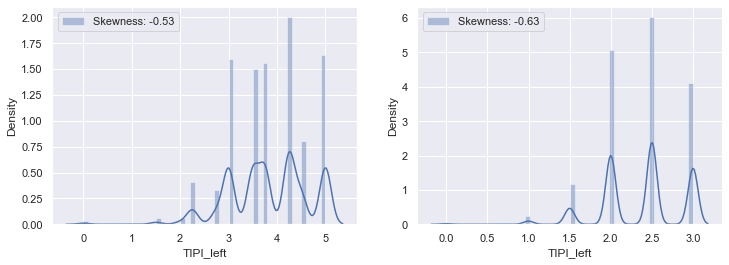

In [35]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
g = sns.distplot(train_tipis_left['TIPI_left'], color='b', label='Skewness: {:.2f}'.format(train_tipis_left['TIPI_left'].skew()), ax=ax[0])
g = g.legend(loc='best')

g = sns.distplot(test_tipis_left['TIPI_left'], color='b', label='Skewness: {:.2f}'.format(test_tipis_left['TIPI_left'].skew()), ax=ax[1])
g = g.legend(loc='best')

In [36]:
train_tipis_right.replace(2, 1, inplace=True)
train_tipis_right.replace(3, 2, inplace=True)
train_tipis_right.replace(4, 3, inplace=True)
train_tipis_right.replace(5, 3, inplace=True)

train_tipis_right['TIPI_right'] = train_tipis_right.sum(axis=1)
train_tipis_right['TIPI_right'] = train_tipis_right['TIPI_right'] / 6

test_tipis_right.replace(2, 1, inplace=True)
test_tipis_right.replace(3, 2, inplace=True)
test_tipis_right.replace(4, 3, inplace=True)
test_tipis_right.replace(5, 3, inplace=True)

test_tipis_right['TIPI_right'] = test_tipis_right.sum(axis=1)
test_tipis_right['TIPI_right'] = test_tipis_right['TIPI_right'] / 6

train_tipis_right = pd.concat([train_tipis_right, train[train.columns[68]]], axis=1)

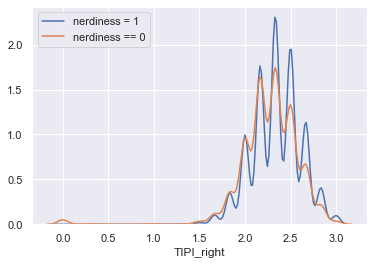

In [37]:
f, ax = plt.subplots(1, 1, figsize=(6,4))
sns.kdeplot(train_tipis_right[train_tipis_right['nerdiness'] == 1]['TIPI_right'], ax=ax)
sns.kdeplot(train_tipis_right[train_tipis_right['nerdiness'] == 0]['TIPI_right'], ax=ax)
plt.legend(['nerdiness = 1', 'nerdiness == 0'])
plt.ylabel('')
plt.show()

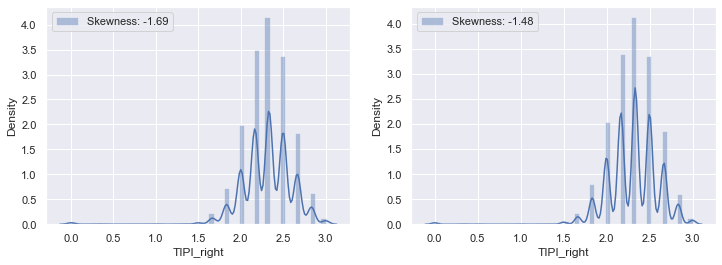

In [38]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
g = sns.distplot(train_tipis_right['TIPI_right'], color='b', label='Skewness: {:.2f}'.format(train_tipis_right['TIPI_right'].skew()), ax=ax[0])
g = g.legend(loc='best')

g = sns.distplot(test_tipis_right['TIPI_right'], color='b', label='Skewness: {:.2f}'.format(test_tipis_right['TIPI_right'].skew()), ax=ax[1])
g = g.legend(loc='best')

In [39]:
train_tipis_else['TIPI_else'] = train_tipis_else.sum(axis=1)
train_tipis_else['TIPI_else'] = train_tipis_else['TIPI_else'] / 2

test_tipis_else['TIPI_else'] = test_tipis_else.sum(axis=1)
test_tipis_else['TIPI_else'] = test_tipis_else['TIPI_else'] / 2

train_tipis_else = pd.concat([train_tipis_else, train[train.columns[68]]], axis=1)

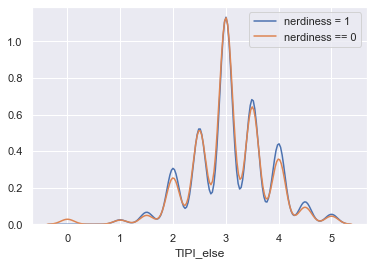

In [40]:
f, ax = plt.subplots(1, 1, figsize=(6,4))
sns.kdeplot(train_tipis_else[train_tipis_else['nerdiness'] == 1]['TIPI_else'], ax=ax)
sns.kdeplot(train_tipis_else[train_tipis_else['nerdiness'] == 0]['TIPI_else'], ax=ax)
plt.legend(['nerdiness = 1', 'nerdiness == 0'])
plt.ylabel('')
plt.show()

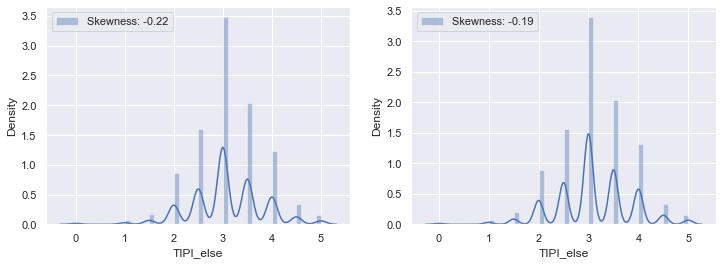

In [41]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
g = sns.distplot(train_tipis_else['TIPI_else'], color='b', label='Skewness: {:.2f}'.format(train_tipis_else['TIPI_else'].skew()), ax=ax[0])
g = g.legend(loc='best')

g = sns.distplot(test_tipis_else['TIPI_else'], color='b', label='Skewness: {:.2f}'.format(test_tipis_else['TIPI_else'].skew()), ax=ax[1])
g = g.legend(loc='best')

## VCL 1 ~ 16

VCL 1,2,4,5 -> 값이 1인 경향이 있음.  
VCL 6,7 -> 값이 0인 경향이 있음.  
VCL 3,8 -> 비슷함  

In [42]:
train.columns[40:56]

Index(['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9',
       'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16'],
      dtype='object')

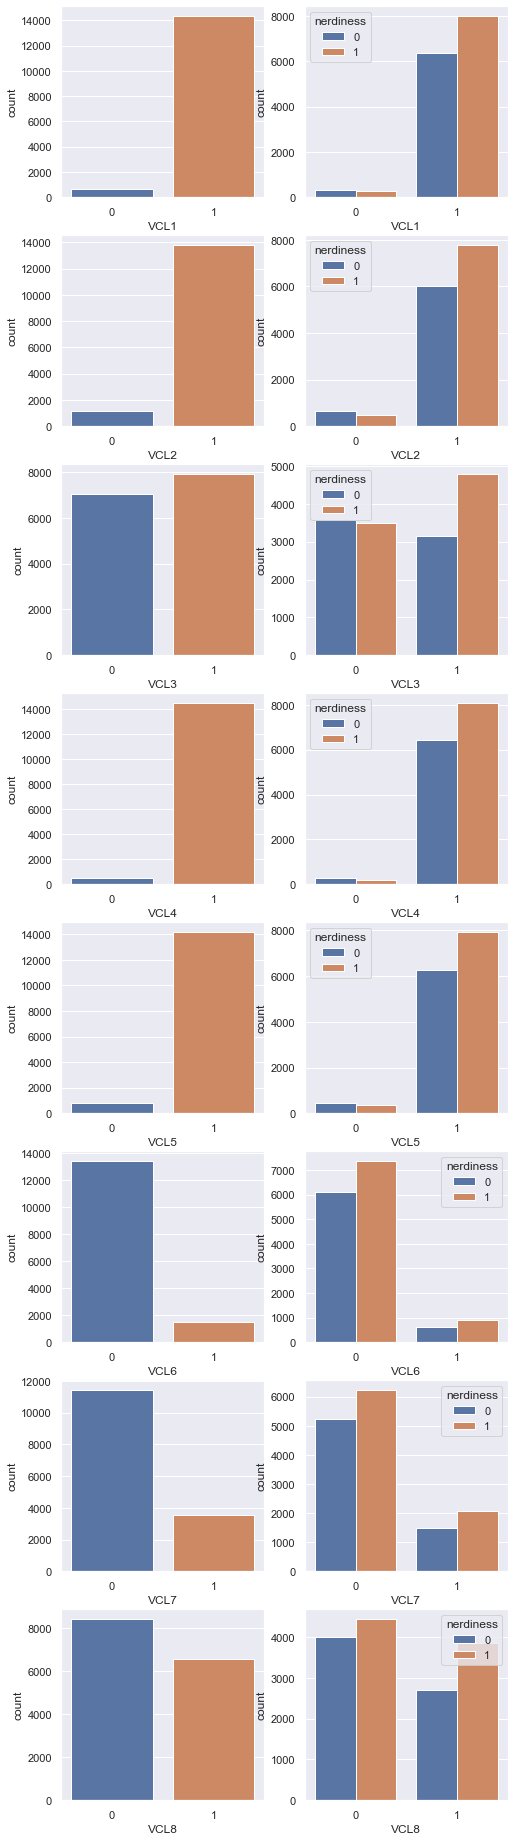

In [43]:
f, ax = plt.subplots(8, 2, figsize=(8, 33))
sns.countplot('VCL1', data=train, ax=ax[0][0])
sns.countplot('VCL1', hue='nerdiness', data=train, ax=ax[0][1])
sns.countplot('VCL2', data=train, ax=ax[1][0])
sns.countplot('VCL2', hue='nerdiness', data=train, ax=ax[1][1])
sns.countplot('VCL3', data=train, ax=ax[2][0])
sns.countplot('VCL3', hue='nerdiness', data=train, ax=ax[2][1])
sns.countplot('VCL4', data=train, ax=ax[3][0])
sns.countplot('VCL4', hue='nerdiness', data=train, ax=ax[3][1])
sns.countplot('VCL5', data=train, ax=ax[4][0])
sns.countplot('VCL5', hue='nerdiness', data=train, ax=ax[4][1])
sns.countplot('VCL6', data=train, ax=ax[5][0])
sns.countplot('VCL6', hue='nerdiness', data=train, ax=ax[5][1])
sns.countplot('VCL7', data=train, ax=ax[6][0])
sns.countplot('VCL7', hue='nerdiness', data=train, ax=ax[6][1])
sns.countplot('VCL8', data=train, ax=ax[7][0])
sns.countplot('VCL8', hue='nerdiness', data=train, ax=ax[7][1])
plt.show()

In [91]:
train_VCL = train[train.columns[40:56]]
test_VCL = test[test.columns[40:56]]

In [92]:
train_VCL_1 = train_VCL[['VCL1', 'VCL2', 'VCL4', 'VCL5']]
train_VCL_1['VCL_1'] = train_VCL_1.sum(axis=1)
train_VCL_1['VCL_1'] = train_VCL_1['VCL_1'] / 4

test_VCL_1 = test_VCL[['VCL1', 'VCL2', 'VCL4', 'VCL5']]
test_VCL_1['VCL_1'] = test_VCL_1.sum(axis=1)
test_VCL_1['VCL_1'] = test_VCL_1['VCL_1'] / 4

train_VCL_1 = pd.concat([train_VCL_1, train[train.columns[68]]], axis=1)

In [93]:
train_VCL.head(10)

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16
0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1
1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1
2,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1
3,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1
4,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1
5,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1
6,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1
7,1,1,1,1,0,0,0,1,0,1,1,0,1,1,1,1
8,1,1,1,1,1,1,0,0,0,1,0,0,1,1,1,1
9,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1


In [94]:
train_VCL_1.head()

,VCL1,VCL2,VCL4,VCL5,VCL_1,nerdiness
0,1,1,1,1,1.0,1
1,1,1,1,1,1.0,1
2,1,1,1,1,1.0,1
3,1,1,1,1,1.0,1
4,1,1,1,1,1.0,0


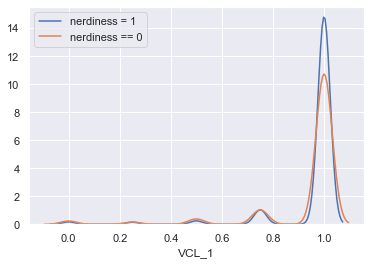

In [95]:
f, ax = plt.subplots(1, 1, figsize=(6,4))
sns.kdeplot(train_VCL_1[train_VCL_1['nerdiness'] == 1]['VCL_1'], ax=ax)
sns.kdeplot(train_VCL_1[train_VCL_1['nerdiness'] == 0]['VCL_1'], ax=ax)
plt.legend(['nerdiness = 1', 'nerdiness == 0'])
plt.ylabel('')
plt.show()

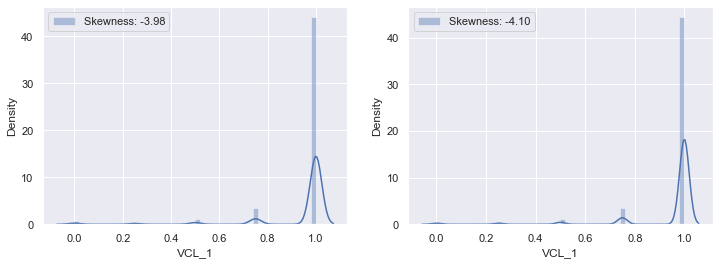

In [96]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
g = sns.distplot(train_VCL_1['VCL_1'], color='b', label='Skewness: {:.2f}'.format(train_VCL_1['VCL_1'].skew()), ax=ax[0])
g = g.legend(loc='best')

g = sns.distplot(test_VCL_1['VCL_1'], color='b', label='Skewness: {:.2f}'.format(test_VCL_1['VCL_1'].skew()), ax=ax[1])
g = g.legend(loc='best')

In [97]:
train_VCL_0 = train_VCL[['VCL6', 'VCL7']]
train_VCL_0.replace(0, 2, inplace=True)
train_VCL_0.replace(1, 0, inplace=True)
train_VCL_0.replace(2, 1, inplace=True)

train_VCL_0['VCL_0'] = train_VCL_0.sum(axis=1)
train_VCL_0['VCL_0'] = train_VCL_0['VCL_0']

test_VCL_0 = test_VCL[['VCL6', 'VCL7']]
test_VCL_0.replace(0, 2, inplace=True)
test_VCL_0.replace(1, 0, inplace=True)
test_VCL_0.replace(2, 1, inplace=True)

test_VCL_0['VCL_0'] = test_VCL_0.sum(axis=1)
test_VCL_0['VCL_0'] = test_VCL_0['VCL_0']

train_VCL_0 = pd.concat([train_VCL_0, train[train.columns[68]]], axis=1)

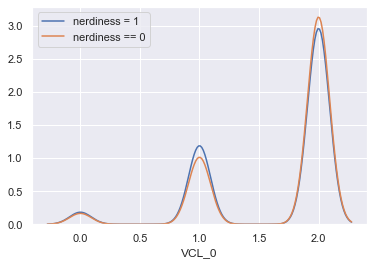

In [98]:
f, ax = plt.subplots(1, 1, figsize=(6,4))
sns.kdeplot(train_VCL_0[train_VCL_0['nerdiness'] == 1]['VCL_0'], ax=ax)
sns.kdeplot(train_VCL_0[train_VCL_0['nerdiness'] == 0]['VCL_0'], ax=ax)
plt.legend(['nerdiness = 1', 'nerdiness == 0'])
plt.ylabel('')
plt.show()

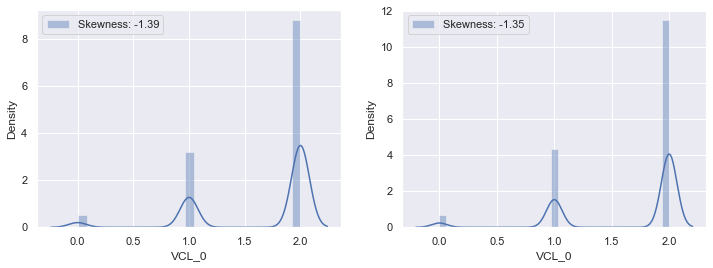

In [99]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
g = sns.distplot(train_VCL_0['VCL_0'], color='b', label='Skewness: {:.2f}'.format(train_VCL_0['VCL_0'].skew()), ax=ax[0])
g = g.legend(loc='best')

g = sns.distplot(test_VCL_0['VCL_0'], color='b', label='Skewness: {:.2f}'.format(test_VCL_0['VCL_0'].skew()), ax=ax[1])
g = g.legend(loc='best')

In [100]:
train_VCL_38 = train_VCL[['VCL3', 'VCL8']]

train_VCL_38['VCL_38'] = train_VCL_38.sum(axis=1)
train_VCL_38['VCL_38'] = train_VCL_38['VCL_38']

test_VCL_38 = test_VCL[['VCL3', 'VCL8']]

test_VCL_38['VCL_38'] = test_VCL_38.sum(axis=1)
test_VCL_38['VCL_38'] = test_VCL_38['VCL_38']

train_VCL_38 = pd.concat([train_VCL_38, train[train.columns[68]]], axis=1)

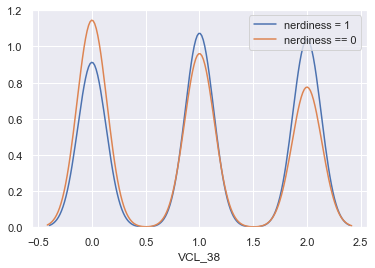

In [101]:
f, ax = plt.subplots(1, 1, figsize=(6,4))
sns.kdeplot(train_VCL_38[train_VCL_38['nerdiness'] == 1]['VCL_38'], ax=ax)
sns.kdeplot(train_VCL_38[train_VCL_38['nerdiness'] == 0]['VCL_38'], ax=ax)
plt.legend(['nerdiness = 1', 'nerdiness == 0'])
plt.ylabel('')
plt.show()

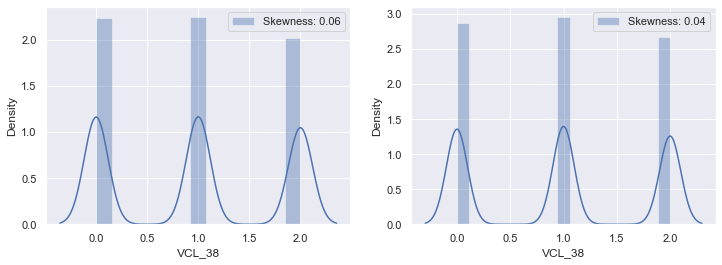

In [102]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
g = sns.distplot(train_VCL_38['VCL_38'], color='b', label='Skewness: {:.2f}'.format(train_VCL_38['VCL_38'].skew()), ax=ax[0])
g = g.legend(loc='best')

g = sns.distplot(test_VCL_38['VCL_38'], color='b', label='Skewness: {:.2f}'.format(test_VCL_38['VCL_38'].skew()), ax=ax[1])
g = g.legend(loc='best')

### education

<AxesSubplot:xlabel='education'>

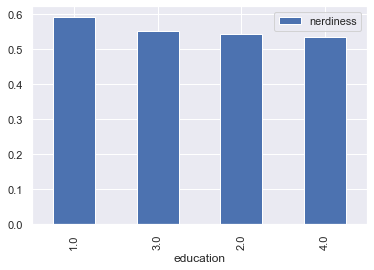

In [56]:
train[['education', 'nerdiness']].groupby(['education'], as_index=True).mean().sort_values(by='nerdiness', ascending=False).plot.bar()

## urban

<AxesSubplot:xlabel='urban'>

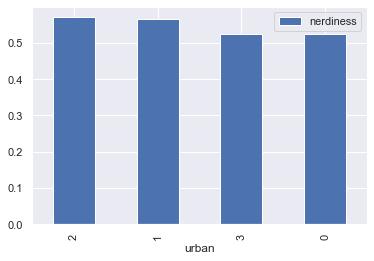

In [57]:
train[['urban', 'nerdiness']].groupby(['urban'], as_index=True).mean().sort_values(by='nerdiness', ascending=False).plot.bar()

## gender

<AxesSubplot:xlabel='gender'>

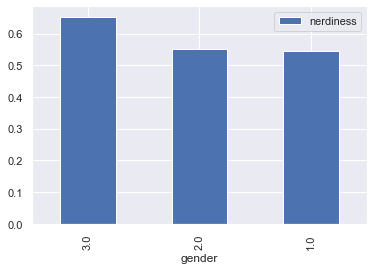

In [58]:
train[['gender', 'nerdiness']].groupby(['gender'], as_index=True).mean().sort_values(by='nerdiness', ascending=False).plot.bar()

## engnat

<AxesSubplot:xlabel='engnat'>

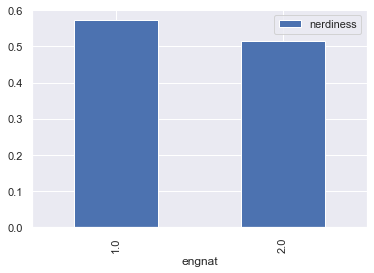

In [59]:
train[['engnat', 'nerdiness']].groupby(['engnat'], as_index=True).mean().sort_values(by='nerdiness', ascending=False).plot.bar()

## hand

<AxesSubplot:xlabel='hand'>

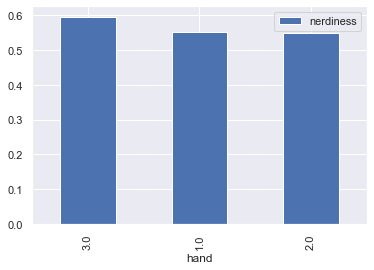

In [60]:
train[['hand', 'nerdiness']].groupby(['hand'], as_index=True).mean().sort_values(by='nerdiness', ascending=False).plot.bar()

## religion

<AxesSubplot:xlabel='religion'>

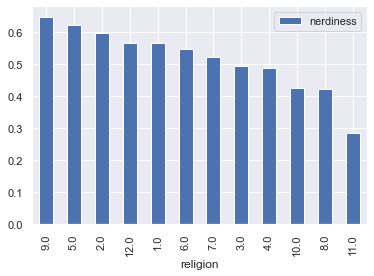

In [61]:
train[['religion', 'nerdiness']].groupby(['religion'], as_index=True).mean().sort_values(by='nerdiness', ascending=False).plot.bar()

## voted 

<AxesSubplot:xlabel='voted'>

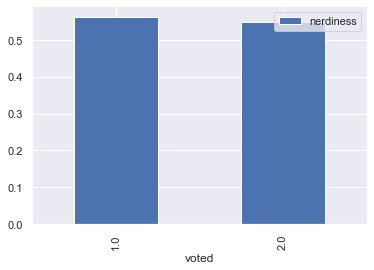

In [62]:
train[['voted', 'nerdiness']].groupby(['voted'], as_index=True).mean().sort_values(by='nerdiness', ascending=False).plot.bar()

## Age

In [63]:
train['age'].isnull().sum()

0

In [64]:
train['age'].nunique()

76

In [65]:
print('제일 나이 많은 탑승객: {:.1f} years'.format(train['age'].max()))
print('제일 어린 탑승객: {:.1f} years'.format(train['age'].min()))
print('탑승객 평균 나이: {:.1f} years'.format(train['age'].mean()))

제일 나이 많은 탑승객: 38822.0 years
제일 어린 탑승객: 13.0 years
탑승객 평균 나이: 26.7 years


In [66]:
train[['age']].sort_values(by='age', ascending=False)[0:10]

,age
9273,38822
6725,722
4976,545
14135,336
4002,123
1739,123
1019,100
12092,99
6526,88
12574,81


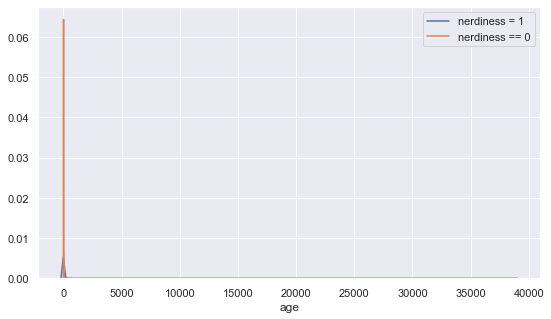

In [67]:
f, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(train[train['nerdiness'] == 1]['age'], ax=ax)
sns.kdeplot(train[train['nerdiness'] == 0]['age'], ax=ax)
plt.legend(['nerdiness = 1', 'nerdiness == 0'])
plt.ylabel('')
plt.show()

In [68]:
train['age_cat'] = 0
test['age_cat'] = 0

In [70]:
train.loc[train['age'] < 10, 'age_cat'] = 0
train.loc[(10 <= train['age']) & (train['age'] < 20), 'age_cat'] = 1
train.loc[(20 <= train['age']) & (train['age'] < 30), 'age_cat'] = 2
train.loc[(30 <= train['age']) & (train['age'] < 40), 'age_cat'] = 3
train.loc[(40 <= train['age']) & (train['age'] < 50), 'age_cat'] = 4
train.loc[(50 <= train['age']) & (train['age'] < 60), 'age_cat'] = 5
train.loc[(60 <= train['age']) & (train['age'] < 70), 'age_cat'] = 6
train.loc[(70 <= train['age']), 'age_cat'] = 7

test.loc[test['age'] < 10, 'age_cat'] = 0
test.loc[(10 <= test['age']) & (test['age'] < 20), 'age_cat'] = 1
test.loc[(20 <= test['age']) & (test['age'] < 30), 'age_cat'] = 2
test.loc[(30 <= test['age']) & (test['age'] < 40), 'age_cat'] = 3
test.loc[(40 <= test['age']) & (test['age'] < 50), 'age_cat'] = 4
test.loc[(50 <= test['age']) & (test['age'] < 60), 'age_cat'] = 5
test.loc[(60 <= test['age']) & (test['age'] < 70), 'age_cat'] = 6
test.loc[(70 <= test['age']), 'age_cat'] = 7

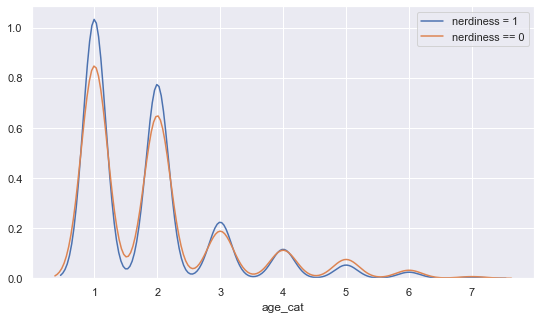

In [71]:
f, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(train[train['nerdiness'] == 1]['age_cat'], ax=ax)
sns.kdeplot(train[train['nerdiness'] == 0]['age_cat'], ax=ax)
plt.legend(['nerdiness = 1', 'nerdiness == 0'])
plt.ylabel('')

plt.show()

## introelapse

In [73]:
train['introelapse'].describe()

count     15000.000000
mean        767.137733
std       13835.948037
min           1.000000
25%           4.000000
50%          10.000000
75%          36.000000
max      855030.000000
Name: introelapse, dtype: float64

In [74]:
train[['introelapse']].sort_values(by='introelapse', ascending=False)[0:10]

,introelapse
13840,855030
6318,855030
14665,817147
1779,285418
373,285418
394,258417
4171,258417
2808,233095
12256,190936
4670,148457


In [75]:
train[['introelapse']].sort_values(by='introelapse', ascending=True)[1000:1010]

,introelapse
3285,2
3195,2
3291,2
3293,2
3298,2
3299,2
3306,2
3164,2
3167,2
3357,2


## testelapse

In [76]:
train['testelapse'].describe()

count     15000.000000
mean        387.965667
std        8513.031610
min           1.000000
25%          82.000000
50%         106.000000
75%         140.000000
max      474572.000000
Name: testelapse, dtype: float64

In [78]:
train[['testelapse']].sort_values(by='testelapse', ascending=False)[0:10]

,testelapse
5196,474572
6836,474572
3698,407208
12427,374744
373,285399
1779,285399
3963,240022
11424,240022
3580,127962
14335,92594


In [79]:
train[['testelapse']].sort_values(by='testelapse', ascending=True)[0:10]

,testelapse
13189,1
13676,4
7533,4
2785,25
11596,30
14381,30
5009,30
5879,30
2099,32
2904,32


## surveyelapse

In [80]:
train['surveyelapse'].describe()

count    1.500000e+04
mean     2.787959e+03
std      1.785955e+05
min      3.000000e+00
25%      1.260000e+02
50%      1.640000e+02
75%      2.170000e+02
max      1.516699e+07
Name: surveyelapse, dtype: float64

In [81]:
train[['surveyelapse']].sort_values(by='surveyelapse', ascending=False)[0:10]

,surveyelapse
1702,15166994
4367,15166994
13517,3420008
14906,2513542
5009,474940
10296,195932
12419,175836
12381,175836
13861,173410
8114,134393


In [82]:
train[['surveyelapse']].sort_values(by='surveyelapse', ascending=True)[0:10]

,surveyelapse
9142,3
14037,4
835,4
738,4
663,4
1775,5
6575,5
13237,5
4766,5
3176,5


## create csv files

In [112]:
final_train = pd.concat([train_q['Qs'], train_tipis_left['TIPI_left'], train_tipis_right['TIPI_right'], train_VCL_1['VCL_1'], 
                    train_VCL_0['VCL_0'], train_VCL_38['VCL_38'], train['education'], train['urban'], train['gender'], train['engnat'],
          train['hand'], train['religion'], train['age_cat'], train['married'], train['orientation'], train['familysize'], train['ASD'] ,train['nerdiness']], axis=1)

final_test = pd.concat([test_q['Qs'], test_tipis_left['TIPI_left'], test_tipis_right['TIPI_right'], test_VCL_1['VCL_1'], 
                    test_VCL_0['VCL_0'], test_VCL_38['VCL_38'], test['education'], test['urban'], test['gender'], test['engnat'],
          test['hand'], test['religion'], test['age_cat'],
                       test['married'], test['orientation'], test['familysize'], test['ASD']], axis=1)

In [113]:
final_train.head()

,Qs,TIPI_left,TIPI_right,VCL_1,VCL_0,VCL_38,education,urban,gender,engnat,hand,religion,age_cat,married,orientation,familysize,ASD,nerdiness
0,2.346154,2.75,2.333333,1.0,2,0,2.0,1,3.0,1.0,2.0,12.0,2,1.0,4.0,4.0,2.0,1
1,2.269231,3.50,2.000000,1.0,1,1,4.0,2,2.0,1.0,1.0,2.0,4,2.0,1.0,4.0,2.0,1
2,2.346154,5.00,2.000000,1.0,1,1,2.0,1,1.0,2.0,1.0,2.0,4,3.0,2.0,4.0,2.0,1
3,2.384615,3.50,2.500000,1.0,2,0,1.0,3,1.0,1.0,2.0,1.0,1,1.0,1.0,2.0,2.0,1
4,2.423077,3.75,2.666667,1.0,2,1,1.0,2,2.0,2.0,2.0,12.0,1,1.0,1.0,1.0,2.0,0


In [114]:
final_train.tail()

,Qs,TIPI_left,TIPI_right,VCL_1,VCL_0,VCL_38,education,urban,gender,engnat,hand,religion,age_cat,married,orientation,familysize,ASD,nerdiness
14995,2.307692,3.75,2.166667,1.0,2,1,2.0,2,2.0,1.0,1.0,1.0,1,1.0,3.0,3.0,2.0,0
14996,2.730769,4.25,2.500000,1.0,2,0,4.0,1,2.0,2.0,1.0,3.0,4,2.0,1.0,3.0,2.0,1
14997,2.884615,5.00,2.000000,1.0,2,0,2.0,2,2.0,1.0,1.0,1.0,2,1.0,2.0,3.0,1.0,1
14998,2.615385,4.50,2.500000,1.0,2,2,3.0,2,2.0,1.0,1.0,12.0,2,2.0,4.0,2.0,1.0,0
14999,2.307692,3.50,2.166667,1.0,2,1,2.0,3,1.0,2.0,1.0,2.0,2,1.0,2.0,1.0,2.0,1


In [115]:
final_train.isna().sum()

Qs               0
TIPI_left        0
TIPI_right       0
VCL_1            0
VCL_0            0
VCL_38           0
education      167
urban            0
gender          19
engnat          47
hand            47
religion       245
age_cat          0
married         82
orientation    399
familysize     319
ASD             89
nerdiness        0
dtype: int64

In [116]:
final_test.isna().sum()

Qs               0
TIPI_left        0
TIPI_right       0
VCL_1            0
VCL_0            0
VCL_38           0
education      373
urban            0
gender          69
engnat         119
hand           121
religion       483
age_cat          0
married        180
orientation    823
familysize     703
ASD            237
dtype: int64

In [117]:
final_train['education'] = final_train['education'].fillna(final_train['education'].mode()[0])
final_train['gender'] = final_train['gender'].fillna(final_train['gender'].mode()[0])
final_train['engnat'] = final_train['engnat'].fillna(final_train['engnat'].mode()[0])
final_train['hand'] = final_train['hand'].fillna(final_train['hand'].mode()[0])
final_train['religion'] = final_train['religion'].fillna(final_train['religion'].mode()[0])
final_train['married'] = final_train['married'].fillna(final_train['married'].mode()[0])
final_train['orientation'] = final_train['orientation'].fillna(final_train['orientation'].mode()[0])
final_train['familysize'] = final_train['familysize'].fillna(final_train['familysize'].mode()[0])
final_train['ASD'] = final_train['ASD'].fillna(final_train['ASD'].mode()[0])

final_test['education'] = final_test['education'].fillna(final_test['education'].mode()[0])
final_test['gender'] = final_test['gender'].fillna(final_test['gender'].mode()[0])
final_test['engnat'] = final_test['engnat'].fillna(final_test['engnat'].mode()[0])
final_test['hand'] = final_test['hand'].fillna(final_test['hand'].mode()[0])
final_test['religion'] = final_test['religion'].fillna(final_test['religion'].mode()[0])
final_test['married'] = final_test['married'].fillna(final_test['married'].mode()[0])
final_test['orientation'] = final_test['orientation'].fillna(final_test['orientation'].mode()[0])
final_test['familysize'] = final_test['familysize'].fillna(final_test['familysize'].mode()[0])
final_test['ASD'] = final_test['ASD'].fillna(final_test['ASD'].mode()[0])

In [118]:
final_train.isna().sum()

Qs             0
TIPI_left      0
TIPI_right     0
VCL_1          0
VCL_0          0
VCL_38         0
education      0
urban          0
gender         0
engnat         0
hand           0
religion       0
age_cat        0
married        0
orientation    0
familysize     0
ASD            0
nerdiness      0
dtype: int64

In [119]:
final_test.isna().sum()

Qs             0
TIPI_left      0
TIPI_right     0
VCL_1          0
VCL_0          0
VCL_38         0
education      0
urban          0
gender         0
engnat         0
hand           0
religion       0
age_cat        0
married        0
orientation    0
familysize     0
ASD            0
dtype: int64

In [122]:
int_df = pd.concat([final_train['VCL_0'], final_train['VCL_38'], final_train['education'], final_train['urban'], final_train['gender'], final_train['engnat'],
          final_train['hand'], final_train['religion'], final_train['hand'], final_train['religion'], final_train['age_cat'],
                    final_train['married'], final_train['orientation'], final_train['familysize'], final_train['ASD']
                    , final_train['nerdiness']], axis=1)

float_df = pd.concat([final_train['Qs'], final_train['TIPI_left'], final_train['TIPI_right'], final_train['VCL_1']], axis=1)

int_df_test = pd.concat([final_test['VCL_0'], final_test['VCL_38'], final_test['education'], final_test['urban'], final_test['gender'], final_test['engnat'],
          final_test['hand'], final_test['religion'], final_test['hand'], final_test['religion'], final_test['age_cat'],
                    final_test['married'], final_test['orientation'], final_test['familysize'], final_test['ASD']],axis=1)

float_df_test = pd.concat([final_test['Qs'], final_test['TIPI_left'], final_test['TIPI_right'], final_test['VCL_1']], axis=1)

In [123]:
int_df.shape

(15000, 16)

In [124]:
float_df.shape

(15000, 4)

In [125]:
int_df_test.shape

(35452, 15)

In [126]:
float_df_test.shape

(35452, 4)

In [127]:
int_df = int_df.astype('int')
int_df_test = int_df_test.astype('int')

In [128]:
real_final_train = pd.concat([int_df, float_df],axis=1)
real_final_test = pd.concat([int_df_test, float_df_test],axis=1)

In [129]:
real_final_train

,VCL_0,VCL_38,education,urban,gender,engnat,hand,religion,hand,religion,age_cat,married,orientation,familysize,ASD,nerdiness,Qs,TIPI_left,TIPI_right,VCL_1
0,2,0,2,1,3,1,2,12,2,12,2,1,4,4,2,1,2.346154,2.75,2.333333,1.0
1,1,1,4,2,2,1,1,2,1,2,4,2,1,4,2,1,2.269231,3.50,2.000000,1.0
2,1,1,2,1,1,2,1,2,1,2,4,3,2,4,2,1,2.346154,5.00,2.000000,1.0
3,2,0,1,3,1,1,2,1,2,1,1,1,1,2,2,1,2.384615,3.50,2.500000,1.0
4,2,1,1,2,2,2,2,12,2,12,1,1,1,1,2,0,2.423077,3.75,2.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2,1,2,2,2,1,1,1,1,1,1,1,3,3,2,0,2.307692,3.75,2.166667,1.0
14996,2,0,4,1,2,2,1,3,1,3,4,2,1,3,2,1,2.730769,4.25,2.500000,1.0
14997,2,0,2,2,2,1,1,1,1,1,2,1,2,3,1,1,2.884615,5.00,2.000000,1.0
14998,2,2,3,2,2,1,1,12,1,12,2,2,4,2,1,0,2.615385,4.50,2.500000,1.0


In [130]:
real_final_test

,VCL_0,VCL_38,education,urban,gender,engnat,hand,religion,hand,religion,age_cat,married,orientation,familysize,ASD,Qs,TIPI_left,TIPI_right,VCL_1
0,0,2,2,3,2,2,1,4,1,4,1,1,4,3,2,2.769231,3.0,2.500000,1.00
1,2,2,2,2,1,1,1,1,1,1,3,1,5,5,2,2.884615,3.0,2.666667,1.00
2,2,1,1,3,2,2,1,4,1,4,1,1,5,3,2,2.692308,2.5,2.666667,1.00
3,0,1,2,2,1,1,1,2,1,2,2,1,2,3,2,2.576923,3.0,2.666667,1.00
4,2,0,2,3,2,2,1,4,1,4,1,1,5,2,2,2.538462,1.5,2.500000,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,2,0,2,3,2,2,3,10,3,10,1,1,4,3,2,2.769231,2.5,2.833333,0.00
35448,2,1,2,2,3,1,3,2,3,2,1,1,5,2,2,2.730769,2.5,2.666667,0.75
35449,2,1,3,3,1,1,1,1,1,1,3,1,5,2,2,2.807692,3.0,2.500000,1.00
35450,1,1,2,3,1,1,1,12,1,12,1,1,1,2,2,2.538462,2.5,2.666667,1.00


In [131]:
real_final_train.to_csv("../data/real_final_train.csv")
real_final_test.to_csv("../data/real_final_test.csv")